In [74]:
import pandas as pd

# Load the data without specifying headers
data = pd.read_csv('../data/financial_data.csv', header=None, encoding='utf-8')

# Extract the multi-level headers
headers = data.iloc[:2]
new_headers = headers.apply(lambda x: '_'.join(x.dropna().astype(str)), axis=0)

# Drop the first two rows as they are now the header
data = data.drop([0, 1])

# Reset the index
data = data.reset_index(drop=True)

# Assign the new headers to the dataframe
data.columns = new_headers

# Debug: Print column names before rename
print(f"Original column names: {data.columns}")
print(f"First column name: {data.columns[0]}")

# Rename the first column to 'Date'
data.rename(columns={data.columns[0].strip(): 'Date'}, inplace=True)

# Debug: Print column names after rename
print(f"Column names after rename: {data.columns}")

# Drop the first row of data
data = data.drop(0)

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


print(data.columns)

# Save the cleaned data to a new CSV file
data.to_csv('../data/cleaned_financial_data.csv', index=False)
# Display the first few rows of the dataframe
print(data.columns)
print(data.head())

print("Data saved to cleaned_financial_data.csv")

Original column names: Index(['Price_Ticker', 'Close_BND', 'Close_SPY', 'Close_TSLA', 'High_BND',
       'High_SPY', 'High_TSLA', 'Low_BND', 'Low_SPY', 'Low_TSLA', 'Open_BND',
       'Open_SPY', 'Open_TSLA', 'Volume_BND', 'Volume_SPY', 'Volume_TSLA'],
      dtype='object')
First column name: Price_Ticker
Column names after rename: Index(['Date', 'Close_BND', 'Close_SPY', 'Close_TSLA', 'High_BND', 'High_SPY',
       'High_TSLA', 'Low_BND', 'Low_SPY', 'Low_TSLA', 'Open_BND', 'Open_SPY',
       'Open_TSLA', 'Volume_BND', 'Volume_SPY', 'Volume_TSLA'],
      dtype='object')
Index(['Date', 'Close_BND', 'Close_SPY', 'Close_TSLA', 'High_BND', 'High_SPY',
       'High_TSLA', 'Low_BND', 'Low_SPY', 'Low_TSLA', 'Open_BND', 'Open_SPY',
       'Open_TSLA', 'Volume_BND', 'Volume_SPY', 'Volume_TSLA'],
      dtype='object')
Index(['Date', 'Close_BND', 'Close_SPY', 'Close_TSLA', 'High_BND', 'High_SPY',
       'High_TSLA', 'Low_BND', 'Low_SPY', 'Low_TSLA', 'Open_BND', 'Open_SPY',
       'Open_TSLA', 'Vol

In [75]:
import pandas as pd

# Load the data
data = pd.read_csv('cleaned_financial_data.csv')

# Display the first few rows of the dataframe
print(data.columns)


Index(['Date', 'Close_BND', 'Close_SPY', 'Close_TSLA', 'High_BND', 'High_SPY',
       'High_TSLA', 'Low_BND', 'Low_SPY', 'Low_TSLA', 'Open_BND', 'Open_SPY',
       'Open_TSLA', 'Volume_BND', 'Volume_SPY', 'Volume_TSLA'],
      dtype='object')


In [76]:
# Inspect the columns to identify the date column
print(data.columns)

# Assuming the date column has been named 'Price_Date' after combining the headers
# Rename the date column to 'Date'
data.rename(columns={data.columns[0]: 'Date'}, inplace=True)

# Convert 'Date' column to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Check if there are any parsing errors
print(data['Date'].isnull().sum())

# Drop rows where 'Date' could not be parsed
data = data.dropna(subset=['Date'])

# Set 'Date' column as index
data.set_index('Date', inplace=True)

# Display the cleaned dataframe
print(data.head())
print(data.columns)





Index(['Date', 'Close_BND', 'Close_SPY', 'Close_TSLA', 'High_BND', 'High_SPY',
       'High_TSLA', 'Low_BND', 'Low_SPY', 'Low_TSLA', 'Open_BND', 'Open_SPY',
       'Open_TSLA', 'Volume_BND', 'Volume_SPY', 'Volume_TSLA'],
      dtype='object')
0
            Close_BND   Close_SPY  Close_TSLA   High_BND    High_SPY  \
Date                                                                   
2015-01-02  62.573128  172.592850   14.620667  62.603412  173.811083   
2015-01-05  62.754833  169.475906   14.006000  62.777545  171.702310   
2015-01-06  62.936501  167.879608   14.085333  63.125772  170.316050   
2015-01-07  62.974377  169.971588   14.063333  63.050084  170.316054   
2015-01-08  62.875977  172.987747   14.041333  62.921400  173.206195   

            High_TSLA    Low_BND     Low_SPY   Low_TSLA   Open_BND  \
Date                                                                 
2015-01-02  14.883333  62.398996  171.542657  14.217333  62.406568   
2015-01-05  14.433333  62.610985  169.16

In [77]:
# Check basic statistics
print(data.describe())

# Check data types
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())


         Close_BND    Close_SPY   Close_TSLA     High_BND     High_SPY  \
count  2535.000000  2535.000000  2535.000000  2535.000000  2535.000000   
mean     69.289451   316.067402   117.848209    69.391261   317.725660   
std       4.792146   117.926909   116.508288     4.800409   118.486409   
min      61.860909   156.800812     9.578000    61.937342   157.864105   
25%      65.565273   214.841965    17.228000    65.630165   215.702207   
50%      68.329124   277.117920    30.298000    68.457862   277.919519   
75%      72.879921   405.869202   221.525002    72.946439   409.134325   
max      78.823273   609.750000   479.859985    78.920157   610.780029   

         High_TSLA      Low_BND      Low_SPY     Low_TSLA     Open_BND  \
count  2535.000000  2535.000000  2535.000000  2535.000000  2535.000000   
mean    120.474827    69.186012   314.157888   115.097514    69.293225   
std     119.236025     4.782142   117.269901   113.698930     4.793199   
min      10.331333    61.822670   154

In [78]:
# Fill missing values with forward fill
data_filled = data.fillna(method='ffill')


/tmp/ipykernel_12156/3338747409.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data.fillna(method='ffill')


In [79]:
from sklearn.preprocessing import StandardScaler

# Normalize or scale the data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_filled), columns=data_filled.columns, index=data_filled.index)


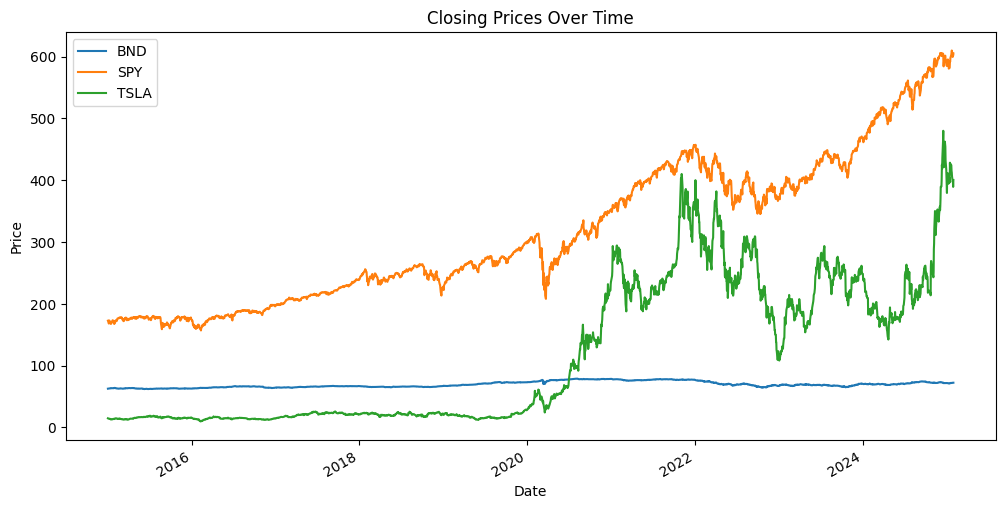

In [80]:
import matplotlib.pyplot as plt

# Plot closing prices
data[['Close_BND', 'Close_SPY', 'Close_TSLA']].plot(figsize=(12, 6))
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['BND', 'SPY', 'TSLA'])
plt.show()


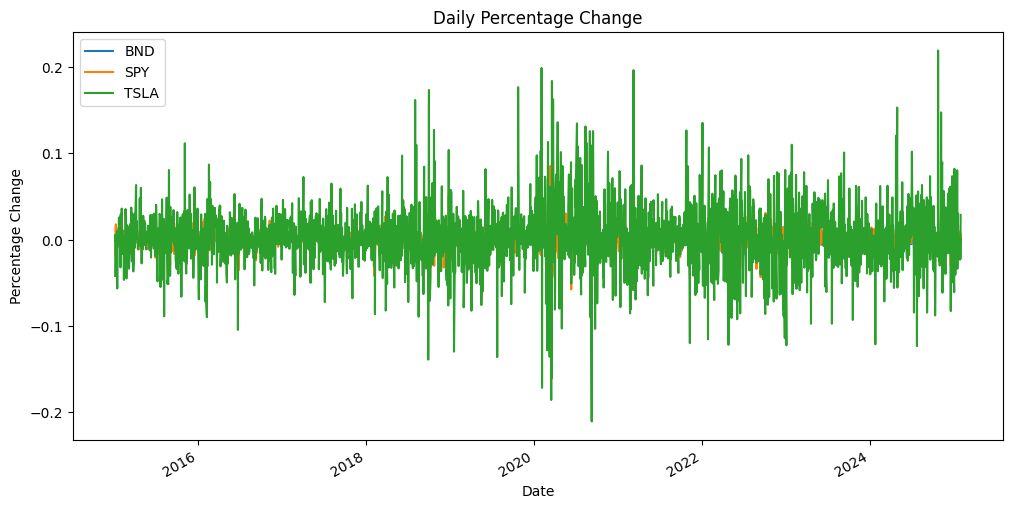

In [81]:
# Calculate daily percentage change
daily_pct_change = data[['Close_BND', 'Close_SPY', 'Close_TSLA']].pct_change()

# Plot daily percentage change
daily_pct_change.plot(figsize=(12, 6))
plt.title('Daily Percentage Change')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend(['BND', 'SPY', 'TSLA'])
plt.show()


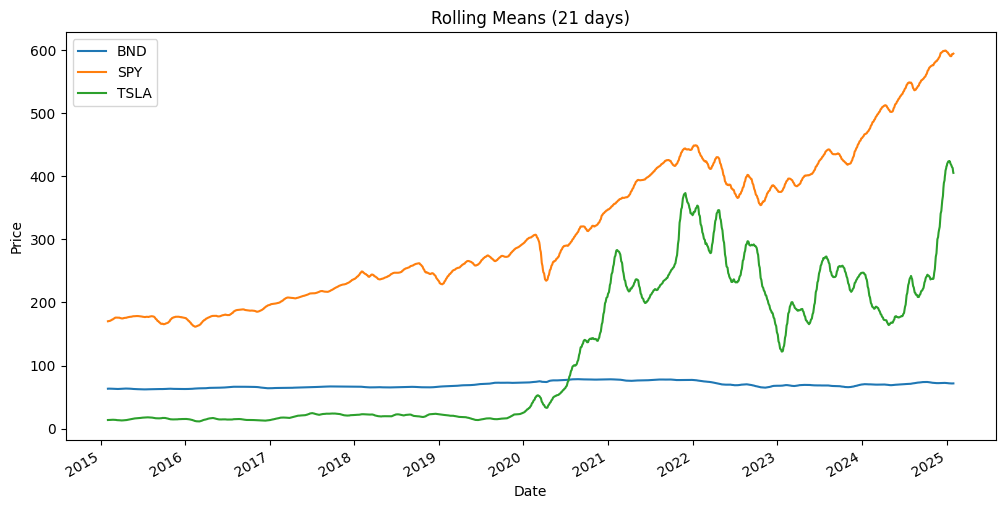

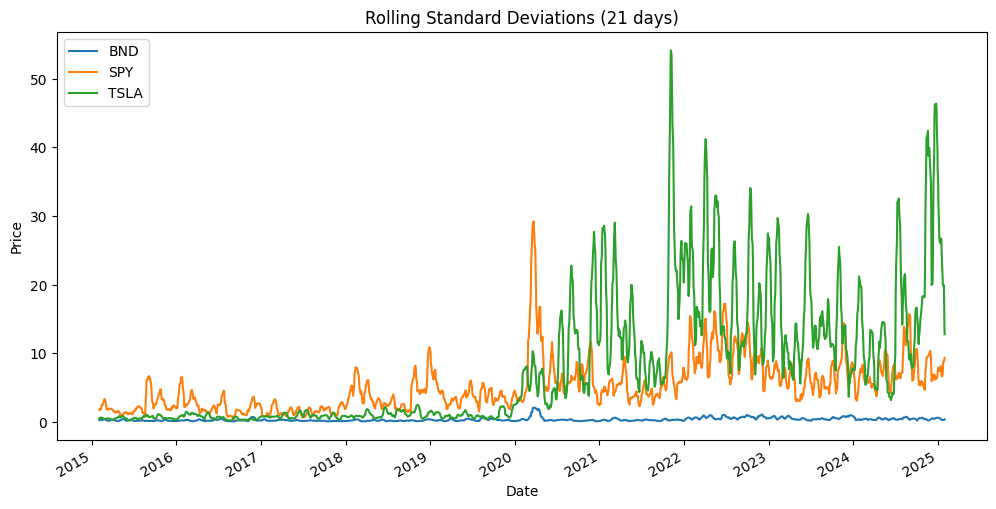

In [82]:
# Calculate rolling means and standard deviations
rolling_mean = data[['Close_BND', 'Close_SPY', 'Close_TSLA']].rolling(window=21).mean()
rolling_std = data[['Close_BND', 'Close_SPY', 'Close_TSLA']].rolling(window=21).std()

# Plot rolling means
rolling_mean.plot(figsize=(12, 6))
plt.title('Rolling Means (21 days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['BND', 'SPY', 'TSLA'])
plt.show()

# Plot rolling standard deviations
rolling_std.plot(figsize=(12, 6))
plt.title('Rolling Standard Deviations (21 days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['BND', 'SPY', 'TSLA'])
plt.show()


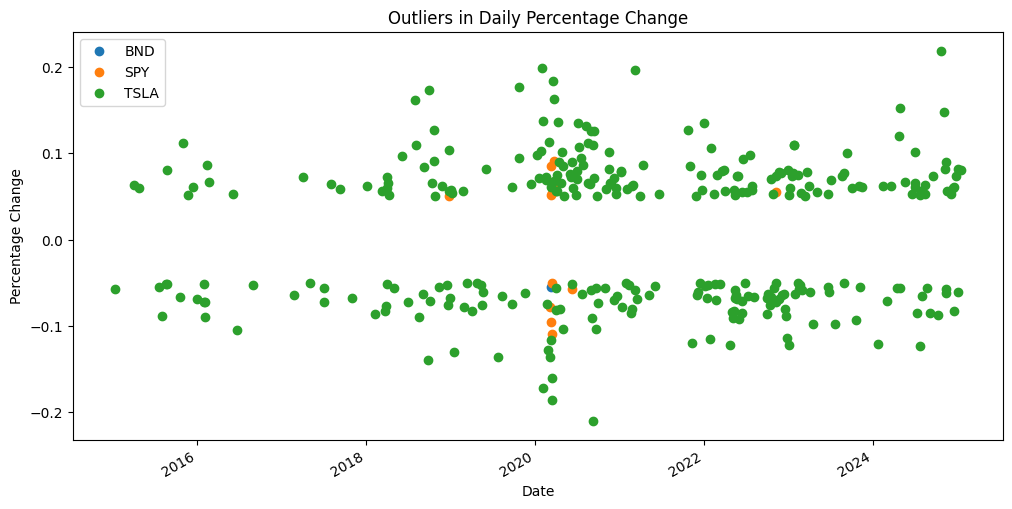

In [83]:
# Identify outliers
outliers = daily_pct_change[(daily_pct_change > 0.05) | (daily_pct_change < -0.05)]

# Plot outliers
outliers.plot(figsize=(12, 6), style='o')
plt.title('Outliers in Daily Percentage Change')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend(['BND', 'SPY', 'TSLA'])
plt.show()


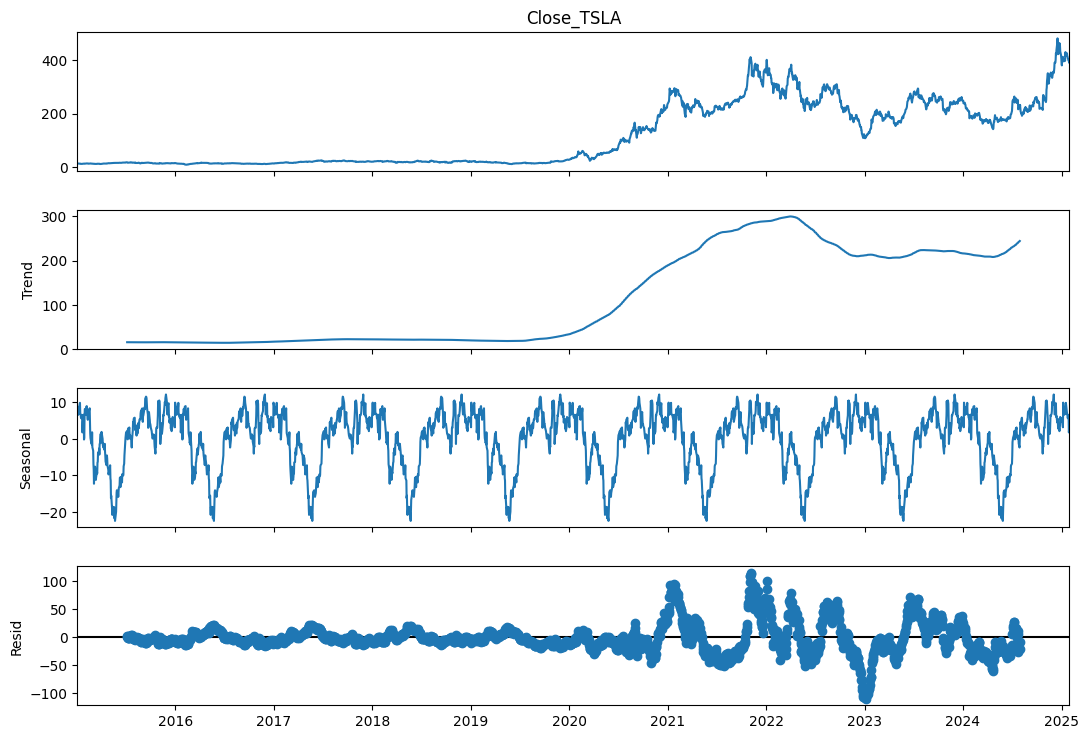

In [84]:
import statsmodels.api as sm

# Decompose the time series for TSLA
decomposition = sm.tsa.seasonal_decompose(data['Close_TSLA'], model='additive', period=252)

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()


In [85]:
# Calculate Value at Risk (VaR)
VaR = daily_pct_change.quantile(0.05)
print(f"Value at Risk (5% quantile):\n{VaR}")

# Calculate Sharpe Ratio
sharpe_ratio = daily_pct_change.mean() / daily_pct_change.std() * (252 ** 0.5)
print(f"Sharpe Ratio:\n{sharpe_ratio}")


Value at Risk (5% quantile):
Close_BND    -0.004801
Close_SPY    -0.016719
Close_TSLA   -0.051387
Name: 0.05, dtype: float64
Sharpe Ratio:
Close_BND     0.288984
Close_SPY     0.797519
Close_TSLA    0.860690
dtype: float64
